# **Principal Component Analysis (PCA) con Scikit-learn**


---
---

### **PCA como técnica que se asocia al aprendizaje no supervisado**

En [aprendizaje supervisado](https://github.com/Bronquivoide/Machine_Learning_Fundamentals/blob/main/Supervised%20Learning/Aprendizaje%20Supervisado.pdf) trabajamos mediante la siguiente formulación (*labeled data*):

Dado un vector de características $\vec{x} \in \mathbb{R}^d$, este tiene una categoría o etiqueta asociada que pertenece al conjunto $\{ y_1, \dots , y_n \}$, la cual debemos hallar.

Ahora, con respecto al aprendizaje no supervisado, trabajamos únicamente con los vectores de características (*unlabeled data*).

PCA es una técnica de aprendizaje no supervisado que se utiliza para simplificar un problema, pues analiza la distribución espacial de los vectores de características mediante la matriz de covarianza para ver si se puede reducir la dimensión obteniendo las variables principales del modelo.

---

### **Dimensionalidad**

A medida que aumenta el número de variables o dimensiones en un conjunto de
datos, la cantidad de datos necesarios para obtener un resultado estadísticamente significativo aumenta. Esto puede llevar a problemas como sobreajuste, aumento del tiempo de cálculo y reducción de la precisión de los modelos de Machine Learning.

Este fenómeno se conoce como la maldición de la dimensionalidad (*Curse of Dimensionality*), que se refiere a los problemas que surgen al trabajar con datos con muchas variables.

---

### **Generalidades del método PCA**

* PCA es un procedimiento estadístico que utiliza una transformación ortogonal para convertir un conjunto de variables correlacionadas en un conjunto
de variables no correlacionadas. Es de las herramientas más utilizadas en el EDA y en el Machine Learning para modelos predictivos.

* PCA es una técnica de reducción de dimensionalidad, lo que quiere decir que toma nuestra base de datos conformada por un conjunto de columnas para transformarlas en otro conjunto de columnas más pequeño. Las columnas de esta nueva base de datos son las llamadas componentes principales, y son resultados de combinaciones lineales de las variables originales, organizados por la cantidad de varianza que explican en los datos.

* La matriz de covarianza es la estrella del PCA, pues es una cantidad que brinda información sobre cómo están esparcidos nuestros datos en el espacio.

* PCA reduce la dimensión si y solo si el problema es lineal, pues captura relaciones lineales entre las variables.

---

### **El método PCA**

PCA parte de determinar los ejes o componentes principales de un conjunto de datos, lo cual conduce a un problema de eigenvalores que implica a los vectores de características $\vec{x} \in \mathbb{R}^d$ y a la matriz de covarianza $Σ \in \mathbb{R}^{d \times d}$ caracteriza a los datos.

Consideremos la siguiente transformación lineal:

$$
  T: \vec{x} → Σ \vec{x} \text{ , } \forall \vec{x} \in \mathbb{R}^d
$$
La pregunta es... ¿cómo actúa la matriz de covarianza sobre un vector de características?:

$Σ$ rota y escala a $\vec{x}$ mediante un problema de eigenvalores

$$
T(\vec{x})= λ \vec{x} = Σ \vec{x}
$$

En donde el término $λ \vec{x} \text{ , } ∀ λ ∈ \mathbb{R}$, es el que se asocia al eje principal.

Hasta ahora el algoritmo que tenemos es:

1) Definir el conjunto de datos $\{\vec{x} \in \mathbb{R}^d\}$.

2) Para el conjunto de datos calculamos la matriz de covarianza $\Sigma \in \mathbb{R}^{d \times d}$.

3) Calculamos los ejes principales (eigenvectores) de $Σ$ mediante $\Sigma \vec{x} = \lambda \vec{x}$.

¿Dónde entra PCA?

El método PCA consiste en encontrar la relación entre los eigenvalores. Nos deshacemos de las direcciones (eigenvectores) con eigenvalores muy pequeños, lo cual se realiza proyectando los datos al eigenvector con el eigenvalor más grande.

Entonces, podemos completar el algoritmo del método PCA con los siguientes pasos:

4) Calculamos los eigenvalores, $\{ \lambda \}$, de los eigenvectores $\vec{x}$ (por definición, a cada eigenvector se le asocia un solo eigenvalor).

5) Nos deshacemos de los eigenvectores con eigenvalores más pequeños.

5) Proyectamos los datos que correspondían al eigenvector del que nos deshicimos proyectándolos hacia otro con eigenvalor más grande.

**Ejemplo:**

Todos los esquemas de este notebook se ejemplificarán en dos dimensiones.

Sea $\{\vec{x}=(x,y)\in \mathbb{R}^2 \}$ el conjunto de vectores de características que representa a un conjunto de datos distribuidos en el círculo unitario. Esquematizamos el método PCA como sigue:

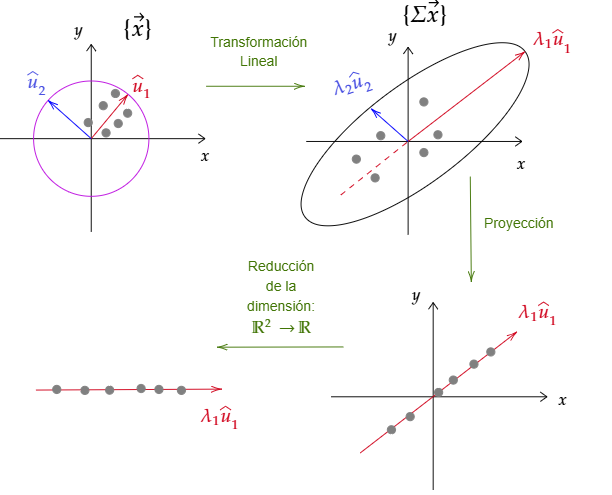

En donde el eje $λ_1 \hat{u}_1$ fue un resumen de dos variables: $x \text{ y } y$.

Para dimensiones más grandes, dado el problema $\Sigma \vec{x} = \lambda \vec{x}$, con un conjunto de eigenvalores asociados $\{\lambda _1 , … , λ _d\}$, tenemos un conjunto de eigenvalores más grandes que el resto, por lo que nos deshacemos de los más pequeños. Por ejemplo, teniendo los siguientes eigenvalores:

$$
λ _1 > λ_2 > λ_3 > λ_4 \gg λ_5 > \cdots λ_{d-1} > λ_d
$$

Nos quedaríamos con el conjunto $\{λ _1 , λ_2 , λ_3 , λ_4\}$.

**Si los datos viven en un espacio $d$-dimensional, PCA mapea linealmente los datos a un espacio de más baja dimensión: $d → d-1$.** Por ejemplo, hablando de imágenes, estas están descritas mediante pixeles, y dependiendo de la resolución $d$ llega a ser muy grande.



---

### **Fundamentos matemáticos del PCA**

Ahora la pregunta es... ¿cómo garantizar que esta metodología no desecha información relevante?, para ello debemos definir matemáticamente el problema del PCA.

Podemos abordar dos maneras de definir el problema con base al ruido:

**1) PCA como procedimiento de minimización del ruido:**

Karl Pearson F.R.S. (1901) LIII. On lines and planes of closest fit to systems
of points in space , The London, Edinburgh, and Dublin Philosophical Magazine and Journal of Science, 2:11, 559-572, DOI: [10.1080/14786440109462720]( https://doi.org/10.1080/14786440109462720)


**2) PCA como procedimiento de maximización de la información:**

Hotelling, H. (1933). Analysis of a complex of statistical variables into principal components. Journal of Educational Psychology, 24(6), 417–441. [https://doi.org/10.1037/h0071325](https://doi.org/10.1037/h0071325)

El ruido en Machine Learning, ya sea para un problema de predicción o de clasificación, suelen ser características que ignoramos al desarrollar un modelo, características que no se correlacionan fácilmente con el objetivo del problema.

Con respecto al ruido, el problema es hallar la primera componente principal:

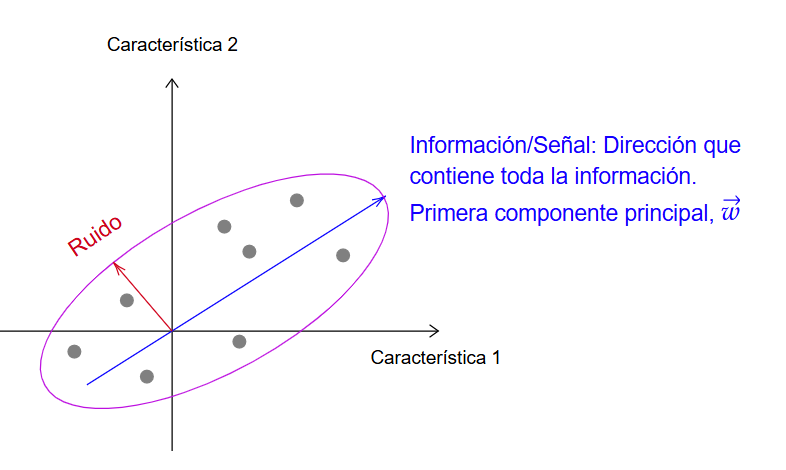

Con base a lo anterior, tenemos dos maneras de hallar la componente principal:

1) La línea definida por $\vec{w}$ minimiza el ruido (Pearson).
2) La línea definida por $\vec{w}$ maximiza la información (Hotelling).

El fin es el mismo, pero matemáticamente son diferentes procesos.

---

### **Pearson, 1901: PCA como procedimiento de minimización del ruido**

* Se asume que existe un eje que tiene toda la información (o señal, $\vec{w}$) de los datos. Las direcciones ortogonales se asumen como ruido.

* Se definen dos ejes ortogonales, $\vec{w}'$ y $\text{ruido}'$. La proyección de los datos sobre $\vec{w}'$ no sería tan óptima como en $\vec{w}$, que es donde se minimiza el ruido.

* El problema es ncontrar el eje ($\vec{w}$) en el que el ruido es menor.

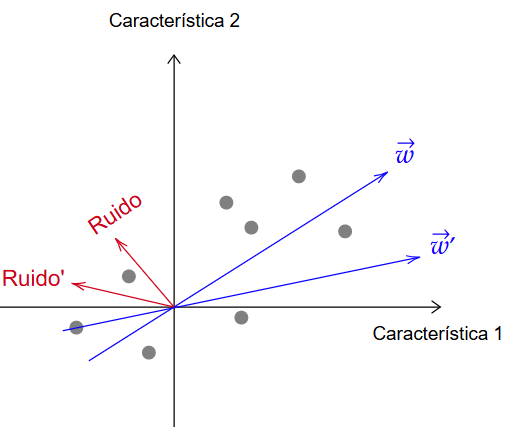

Para minimizar el ruido reteniendo la mayor cantidad de información, definimos una proyección para un vector de características $\vec{x}_k$:

$$
\widehat{x}_k=\vec{w}(\vec{w}^T \vec{x}_k)
$$

Tal que la diferencia (distancia) entre el dato original ($\vec{x}_k$) y la proyección ($\widehat{x}_k$), $||\vec{x}_k - \widehat{x}_k||$, sea mínima.

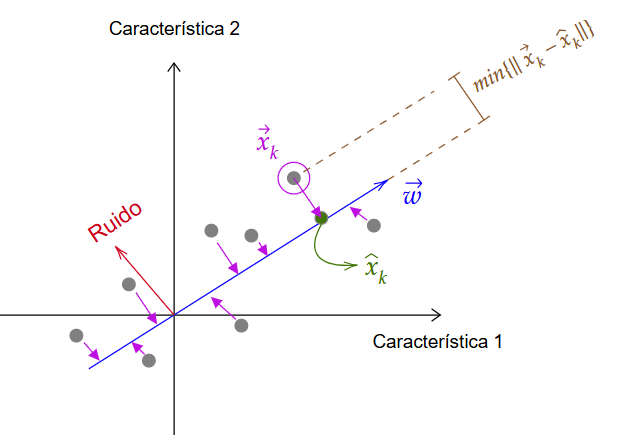

Como lo que queremos es encontrar el $\vec{w}$ que minimice el error en la proyección (ruido), el problema de optimización para $M$ muestras es:

$$
ArgMin_{\vec{w}}\{ \frac{1}{M} ∑_{k=1}^M ||\vec{x}_k - \vec{w}(\vec{w}^T \vec{x}_k )||^2\} \text{, sujeto a } ||\vec{w}||^2=1
$$

Hablamos de un problema de optimización restringida, pues $\vec{w}$ debe estar normalizado.

---

### **Hotelling, 1933: PCA como procedimiento de maximización de la información**

* Abordamos PCA como un procedimiento de maximización de la varianza de la señal a lo largo de $\vec{w}$.

* El problema es encontrar el eje ($\vec{w}$) tal que respecto a él, los datos se encuentren más dispersos. COn esto hablamos de mayor resolución del problema.

* Queremos maximizar la distancia centro-dato proyectado, definida como $d(\vec{0},\vec{x}_k) = \vec{w}^T \vec{x}_k$

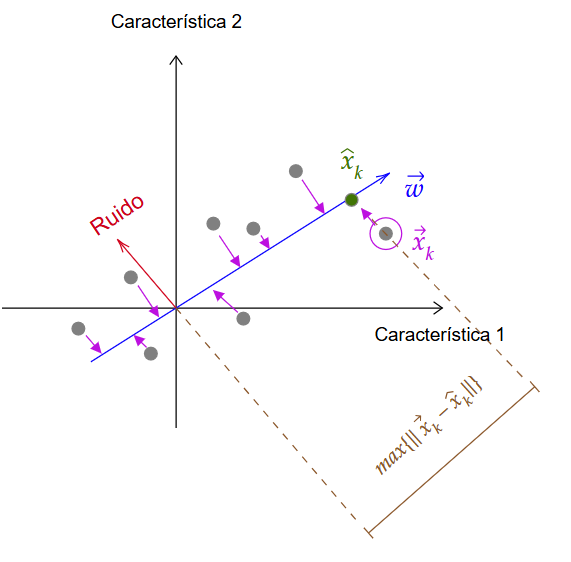

Entonces, el problema de optimización para $M$ muestras es:

$$
ArgMax_{\vec{w}} \{ \frac{1}{M} \sum _{k=1}^M (\vec{w}^T \vec{x}_k)^2\} \text{ , sujeto a } ||\vec{w}||^2=1
$$

---

### **Relación entre PCA como problema de maximización y como problema de minimización**

El problema de minimización planteado anteriormente:

$$
ArgMin_{\vec{w}}\{ \frac{1}{M} ∑_{k=1}^M ||\vec{x}_k - \vec{w}(\vec{w}^T \vec{x}_k )||^2\}
$$

Es equivalente a:

$$
ArgMin_{\vec{w}}\{ \frac{1}{M} ∑_{k=1}^M [- \vec{x}_k \vec{w}(\vec{w}^T \vec{x}_k )]\} = ArgMin_{\vec{w}}\{ \frac{1}{M} ∑_{k=1}^M [-\vec{w}^T \vec{x}_k]^2  \}=ArgMax_{\vec{w}} \{ \frac{1}{M} ∑_{k=1}^M (\vec{w}^T \vec{x}_k) ^2\}
$$


Por lo tanto, PCA como problema de minimización del ruido ($ArgMin_{\vec{w}}\{ \frac{1}{M} ∑_{k=1}^M ||\vec{x}_k - \vec{w}(\vec{w}^T \vec{x}_k )||^2\}$) es equivalente a PCA como maximización de la varianza de la información a lo largo de $\vec{w}$ ($ArgMax_{\vec{w}} \{ \frac{1}{M} ∑_{k=1}^M (\vec{w}^T \vec{x}_k) ^2\}$).

---

### **La restricción $||\vec{w}||^2=1$**

Buscamos encontrar la solución $\vec{w} ^* =ArgMin\{\frac{1}{M} ∑_{k=1}^M ||\vec{x}_k - \vec{w}(\vec{w}^T \vec{x}_k )||^2 \}$ restringida a una hiperesfera descrita por:

$$
||\vec{w}||^2 =1
$$

Como los vectores de características son $\vec{x}_k \in \mathbb{R}^d$, la esfera es $d-$dimensional.

Definimos
$$
f(\vec{w})=\frac{1}{M} ∑_{k=1}^M ||\vec{x}_k - \vec{w}(\vec{w}^T \vec{x}_k )||^2
$$

Sin la restricción, $\vec{w}' = ArgMin_{\vec{w}} \{f(\vec{w})\}$ podría tomar cualquier valor, tan grande o tan pequeño. Por ello buscamos una solución que respete la condición $\vec{w} ^* =ArgMin_{\vec{w};||\vec{w}||^2 =1}\{f(\vec{w})\}$ aunque no sea el mínimo global.

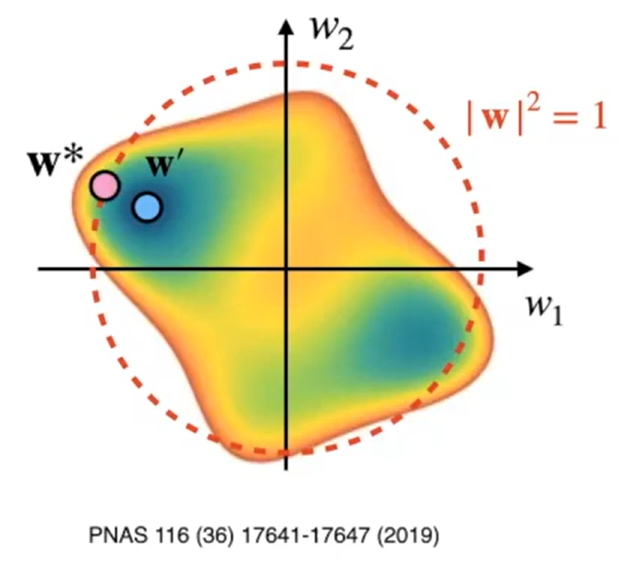






---

### **Resolviendo el problema de optimización**

Recordemos que el problema de optimización con multiplicadores de Lagrange se plantea, para un caso de maximización, de la siguiente manera.

Dado $\vec{\theta} \in \mathbb{R}^n$, con una restricción $g(\vec{\theta}):\mathbb{R}^n \rightarrow \mathbb{R}$ que se iguala a cero, hallamos $\widehat{\theta}=ArgMax_{\vec{\theta}}\{f(\vec{\theta})\}$, para $f: \mathbb{R}^n \rightarrow \mathbb{R}$ siguiendo los siguientes pasos:

1) Construir la función lagrangiana definida como

$$
\mathcal{L}(\vec{\theta},λ) = f(\vec{\theta})+ \lambda g(\vec{\theta})
$$

2) Encontrar el máximo/mínimo de $\mathcal{L}$:

$$
\begin{cases}
∇_{\vec{\theta}}\mathcal{L}(\vec{\theta},λ) = ∇_{\vec{\theta}}f(\vec{\theta})+ \lambda  ∇_{\vec{\theta}}g(\vec{\theta}) | _{\vec{\theta}=\widehat{\theta}} = \vec{0}\\
\frac{∂}{∂λ}\mathcal{L}(\vec{\theta},λ)=g(\vec{\theta})=0
\end{cases}
$$

Para el problema de optimización de PCA, dadas $f(\vec{w})=\frac{1}{M} \sum _{k=1}^M (\vec{x}_k ^T \vec{w})^2$ y $g(\vec{w})=||\vec{w}||^2=1$ hallaremos $\vec{w}^* =ArgMax\{f(\vec{w})\}$ bajo la restricción  $g(\vec{w})=0$:

$$
1) \text{ } \mathcal{L}(\vec{w},λ)=\frac{1}{M} \sum _{k=1}^M (\vec{x}_k ^T \vec{w})^2 + \lambda (1-\vec{w}^T \vec{w})= \vec{w}^T Σ \vec{w}+  \lambda (1-\vec{w}^T \vec{w})
$$

En donde $\Sigma$ es la matriz de covarianza de los datos.

$$
2) \text{ } \begin{cases}
∇_{\vec{w}}\mathcal{L}(\vec{w},λ) = ∇_{\vec{w}}(\vec{w}^T \Sigma \vec{w})+ \lambda  ∇_{\vec{w}}(1-\vec{w}^T \vec{w}) = Σ \vec{w} - \lambda \vec{w} = \vec{0} ⇒ Σ\vec{w}=\lambda \vec{w}\\
\frac{∂}{∂λ}\mathcal{L}(\vec{w},λ)=\frac{∂}{∂λ} \lambda (1-\vec{w}^T \vec{w})=1-\vec{w}^T \vec{w}=0 ⇒ \vec{w}^T \vec{w}=1
\end{cases}
$$

**Por lo tanto, este problema de optimización de maximizar la información (que es equivalente al problema de minimizar el ruido), efectivamente te conduce a un problema de eigenvalores.**

---

### **Implementación de PCA**

Antes de implementar el PCA, hay un paso importante a seguir para garantizar un funcionamiento adecuado:

* [Estandarizar los datos](https://github.com/Bronquivoide/Machine_Learning_Fundamentals/blob/main/Preprocesamiento%20De%20Datos/Normalizaci%C3%B3n%20y%20Estandarizaci%C3%B3n/Normalizaci%C3%B3n_y_Estandarizaci%C3%B3n_de_Datos.ipynb): Hay que asegurarse de que todas las variables tengan una escala similar, ya que PCA es sensible a la escala.

Con base a la estandarización se calcula la matriz de covarianza, que es de donde se toma el problema de eigenvalores y eigenvectores, de donde sobre los eigenvectores, de todo lo abordado anteriormente, podemos concluir que:

* Los eigenvectores indican las direcciones (componentes principales) en las que los datos tienen mayor variabilidad.

* Los eigenvalores asociados a cada eigenvector indican cuánta varianza explica ese componente principal. Un eigenvalor alto significa que ese componente principal captura mucha información de los datos originales.

---

### **PCA en `scikit-learn`**

    from sklearn.decomposition import PCA

    X=DataSet
    pca = PCA(n_components)
    X_reduced = pca.fit_transform(X)

    print(f'La varianza explica cada componente es {pca.explained_variance_ratio_}')

* El argumento `n_components` es un hiperparámetro que recibe un entero, por lo que hay que definirlo adecuadamente para no perder información.

---

### **Ejemplo: PCA sobre un dataset**

Trabajaremos con una base de datos sintéticos que comparen edad, con peso y altura.

Para hallar el hiperparámetro `n_components` adecuado, vamos a explorar el problema para determinar cuántas componentes principales explican entre el 80% y el 90% de la varianza (es la convención que comunmente se toma), es decir, vamos a ver cuál es el número óptimo de dimensiones tal que se reduzca la dimensión original.

Primeramente, vamos a abordar manualmente el problema abstracto de los eigenvalores y eigenvectores para comprender claramente su papel en el problema de reducción de la dimensionalidad.

Posteriormente, implementaremos el método PCA con `scikit-learn`.


# **Definiendo el dataset y hallando el hiperparámetro `n_components`:**

Abordaremos los pasos 1., 2., 3. y 4. del algoritmo planteado en la sección anterior que titulamos **El método PCA**.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Creando el dataframe de datos sintéticos
data = {
    "Edad": [25, 30, 45, 35, 50],
    "Peso(kg)": [70, 80, 75, 85, 90],
    "Altura(m)": [170, 175, 180, 178, 182]}

df = pd.DataFrame(data)
display(df)
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Matriz de covarianza
cov_matrix = df.cov()
print(f"La matriz de covarianza es:\n {cov_matrix}")
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Matriz de correlaciones
corr_matrix = df.corr()
print(f"La matriz de correlaciones es:\n {corr_matrix}")
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Escalando mediante estandarización
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
print("Datos Estandarizados:")
display(df)
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Matriz de covarianza estandarizada
cov_matrix = df.cov()
print(f"Matriz de covarianza con datos estandarizados:\n {cov_matrix}")
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Eigenvalores y eigenvectores de la matriz de covarianza con el módulo de álgebra lineal de NumPy
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

#Eigenvalores
print(f"Los eigenvalores son:\n {eigenvalues}")
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Eigenvectores
print(f"Los eigenvectores son:\n {eigenvectors}")

,Edad,Peso(kg),Altura(m)
0,25,70,170
1,30,80,175
2,45,75,180
3,35,85,178
4,50,90,182


°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
La matriz de covarianza es:
              Edad  Peso(kg)  Altura(m)
Edad       107.50      50.0      46.25
Peso(kg)    50.00      62.5      27.50
Altura(m)   46.25      27.5      22.00
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
La matriz de correlaciones es:
                Edad  Peso(kg)  Altura(m)
Edad       1.000000  0.609994   0.951034
Peso(kg)   0.609994  1.000000   0.741620
Altura(m)  0.951034  0.741620   1.000000
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Datos Estandarizados:


,0,1,2
0,-1.293993,-1.414214,-1.668560
1,-0.754829,0.000000,-0.476731
2,0.862662,-0.707107,0.715097
3,-0.215666,0.707107,0.238366
4,1.401826,1.414214,1.191828


°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Matriz de covarianza con datos estandarizados:
           0         1         2
0  1.250000  0.762493  1.188793
1  0.762493  1.250000  0.927025
2  1.188793  0.927025  1.250000
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Los eigenvalores son:
 [3.17997074 0.0392333  0.53079596]
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Los eigenvectores son:
 [[-0.58684366 -0.62681466  0.51256015]
 [-0.52708583 -0.18480502 -0.82947431]
 [-0.61465034  0.75693493  0.22193346]]


Cada vector de características es de la forma:

$$
\vec{x} =\begin{pmatrix}
\text{Edad} \\
\text{Altura} \\
\text{Peso}
\end{pmatrix} \in \mathbb{R}^3
$$

En donde los eigenvectores del problema $\Sigma \vec{x} = \lambda \vec{x}$ son:

$$
\vec{x}_1 =\begin{pmatrix}
-0.58684366 \\
-0.52708583 \\
-0.61465034
\end{pmatrix}, \quad
\vec{x}_2 = \begin{pmatrix}
-0.62681466 \\
-0.18480502 \\
0.75693493
\end{pmatrix}, \quad
\vec{x}_3 = \begin{pmatrix}
0.51256015 \\
-0.82947431 \\
0.22193346
\end{pmatrix}
$$

Por lo que tenemos tres componentes principales. ¿Cómo interpretar la información de estos eigenvectores?

Podemos ver que el primer eigenvector muestra lo siguiente:

- Con un $-0.58$, la edad contribuye de manera moderada pero a su vez negativa a este primer componente principal.

- Con un $-0.52$, el peso contribuye de manera moderada pero negativa al segundo primer componente principal.

- Con un $-0.61$, la altura contribuye en en mayor medida a las demás, pero igual negativa, al primer componente principal. En este caso esta es la que más contribuye.

Y análogamente podemos interpretar $\vec{x}_2$ y $\vec{x}_3$.

A continuación abordaremos los pasos 5. y 6. del algoritmo:

In [ ]:
#Calculando el porcentaje de varianza explicada por cada eigenvalor
varianza_total = np.sum(eigenvalues)
varianza_explicada = (eigenvalues / varianza_total) * 100
print(varianza_explicada)
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(f"El porcentaje de varianza explicada por la primer componente principal es de: {varianza_explicada[0]: .2f}%")
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(f"El porcentaje de varianza explicada por la segunda componente principal es de: {varianza_explicada[1]: .2f}%")
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

print(f"El porcentaje de varianza explicada por la tercer componente principal es de: {varianza_explicada[2]: .2f}%")


[84.79921963  1.04622132 14.15455906]
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
El porcentaje de varianza explicada por la primer componente principal es de:  84.80%
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
El porcentaje de varianza explicada por la segunda componente principal es de:  1.05%
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
El porcentaje de varianza explicada por la tercer componente principal es de:  14.15%


* La selección de los componentes principales mediante los eigenvectores correspondientes a los eigenvalores más altos.

* La cantidad de componentes principales que se conservan depende de cuánta varianza se quiera retener (usualmente se toma entre un 80% o 90%).

* En este caso vamos a seleccionar el primer y tercer componente, ya que juntos llegan a mostrar hasta casi un 99% de la varianza total, y cumpliríamos con la parte de reducción de dimensionalidad.

* También podría seleccionarse únicamente el primer componente, pues cumple con el umbral de aceptación de la varianza total, pero se perdería el resto de información.

* Finalmente, la proyección de los datos es sobre los componentes principales seleccionados, creando un nuevo conjunto de datos con menos dimensiones.

**Por lo tanto, `n_components` debe ser igual a 2.**

# **Implementando PCA en `scikit-learn`:**\

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

#Varianza
print(f"Porcentaje de varianza explicada por cada componente: {pca.explained_variance_ratio_ * 100}")
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Nuevo dataframe con la dimensión reducida
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"]) #Scikit-learn acomoda el índice de los componentes principales. Como tomamos 2, los presenta con los subíndices 1 y 2
print("Los datos proyectados en las dos componentes principales son:")
display(df_pca)
print('°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°')

#Reducción de la dimensión
print(f"Redujimos de {df.shape[1]} a {df_pca.shape[1]} dimensiones")

Porcentaje de varianza explicada por cada componente: [84.79921963 14.15455906]
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Los datos proyectados en las dos componentes principales son:


,PC1,PC2
0,-2.530364,-0.139495
1,-0.735990,0.492698
2,0.573076,-1.187397
3,0.392656,0.644167
4,2.300622,0.190027


°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Redujimos de 3 a 2 dimensiones


# **Conclusión del método PCA en `scikit-learn`:**

Mediante PCA transformamos el espacio de características de $\mathbb{R}^3 →\mathbb{R}^2$.

La proyección que se realiza en `scikit-learn` es de la siguiente forma:

* Dados los vectores de características $\{ \vec{x}_j \in \mathbb{R}^3\}$, estos fueron transformados mediante una estandarización $\vec{x}_j → \vec{z}_j$. En este caso $j=1,2,3,4,5$.

* Tenemos también los eigenvectores de la matriz de covarianza $Σ$, $\{ \vec{v}_i \in \mathbb{R}^3 \} $. En este caso $i=1,2,3$.


* Como tomamos dos componentes principales, la proyección de los datos sobre ellos, por definición, es un producto punto

$$
PC_1= \vec{z}_j^T \vec{v}_1  \\
PC_2= \vec{z}_j^T \vec{v}_2
$$

* O escribiendo en términos generales, la proyección consiste en el producto de la matriz de diseño estandarizada $Z$ con la matriz que concatena los eigenvectores $V$

$$
Z_{proy}= Z ⋅ V
$$

* En nuestro caso $Z$ es de orden $5\times 3$ y $V$ de orden $3\times 3$. Como el producto de matrices está definido para la forma $(m \times n) \cdot (n \times p)$, podemos hacer este producto.

* Ejemplo, para
$$
\vec{z}_1 =\begin{pmatrix}
\text{-1.293993} \\
\text{-1.414214} \\
\text{-1.668560}
\end{pmatrix}
$$

La proyección en la primera componente principal

$$
\vec{v}_1 =\begin{pmatrix}
-0.58684366 \\
-0.52708583 \\
-0.61465034
\end{pmatrix}
$$


es:

$$
PC_1= \vec{z}_1^T \vec{v}_1 =(-1.293993,-1.414214, -1.668560) \begin{pmatrix}
-0.58684366 \\
-0.52708583 \\
-0.61465034
\end{pmatrix}\\
≈2.53
$$

* Esta cantidad aparece como negativa en el dataframe de datos proyectados dado que los eigenvectores de una matriz no son únicos en su dirección. Es decir, si se tiene que \vec{v} es eigenvector de $Σ$, también lo es $-\vec{v}$. `scikit-learn` hace que sigan cierta convención para que la varianza o los datos transformados estén orientados en una dirección determinada.

* Existe una desventaja con este método, como se vio en el dataframe de los datos proyectados en las dos componentes principales, el título de las variables desaparece, únicamente podemos llamarlo como PC1 y PC2. Como las nuevas dimensiones son combinaciones lineales de las demás variables, no tienen un significado como tal, por lo que es más complicada la interpretación.

